This notebook takes a CSV which gives the number of bike hires each day and does a time series analysis

# Import libraries and data

In [2]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
daily_hires = pd.read_csv("tfl-daily-cycle-hires_.csv")

In [13]:
daily_hires.head()

,day,hires
day,,
2010-01-08,2010-01-08,4303
2010-01-09,2010-01-09,19332
2010-01-10,2010-01-10,11424
2010-01-11,2010-01-11,19785
2010-01-12,2010-01-12,9848


# Data Cleaning

In [4]:
daily_hires =daily_hires.drop(["Unnamed: 2"], axis =1)

In [5]:
daily_hires.dtypes

Day                        object
Number of Bicycle Hires    object
dtype: object

In [6]:
daily_hires.columns = ["day", "hires"]

In [7]:
daily_hires.hires=daily_hires.hires.apply(lambda x:x.replace(",", ""))

In [8]:
daily_hires.hires=daily_hires.hires.astype(int)

In [9]:
daily_hires.day=pd.to_datetime(daily_hires.day)


In [10]:
daily_hires = daily_hires.sort_values(by = 'day') 

In [11]:
# set date as Index
daily_hires.index = pd.DatetimeIndex(daily_hires.day, freq='infer')


# Time Series Analysis

mean : 25883.269861943216


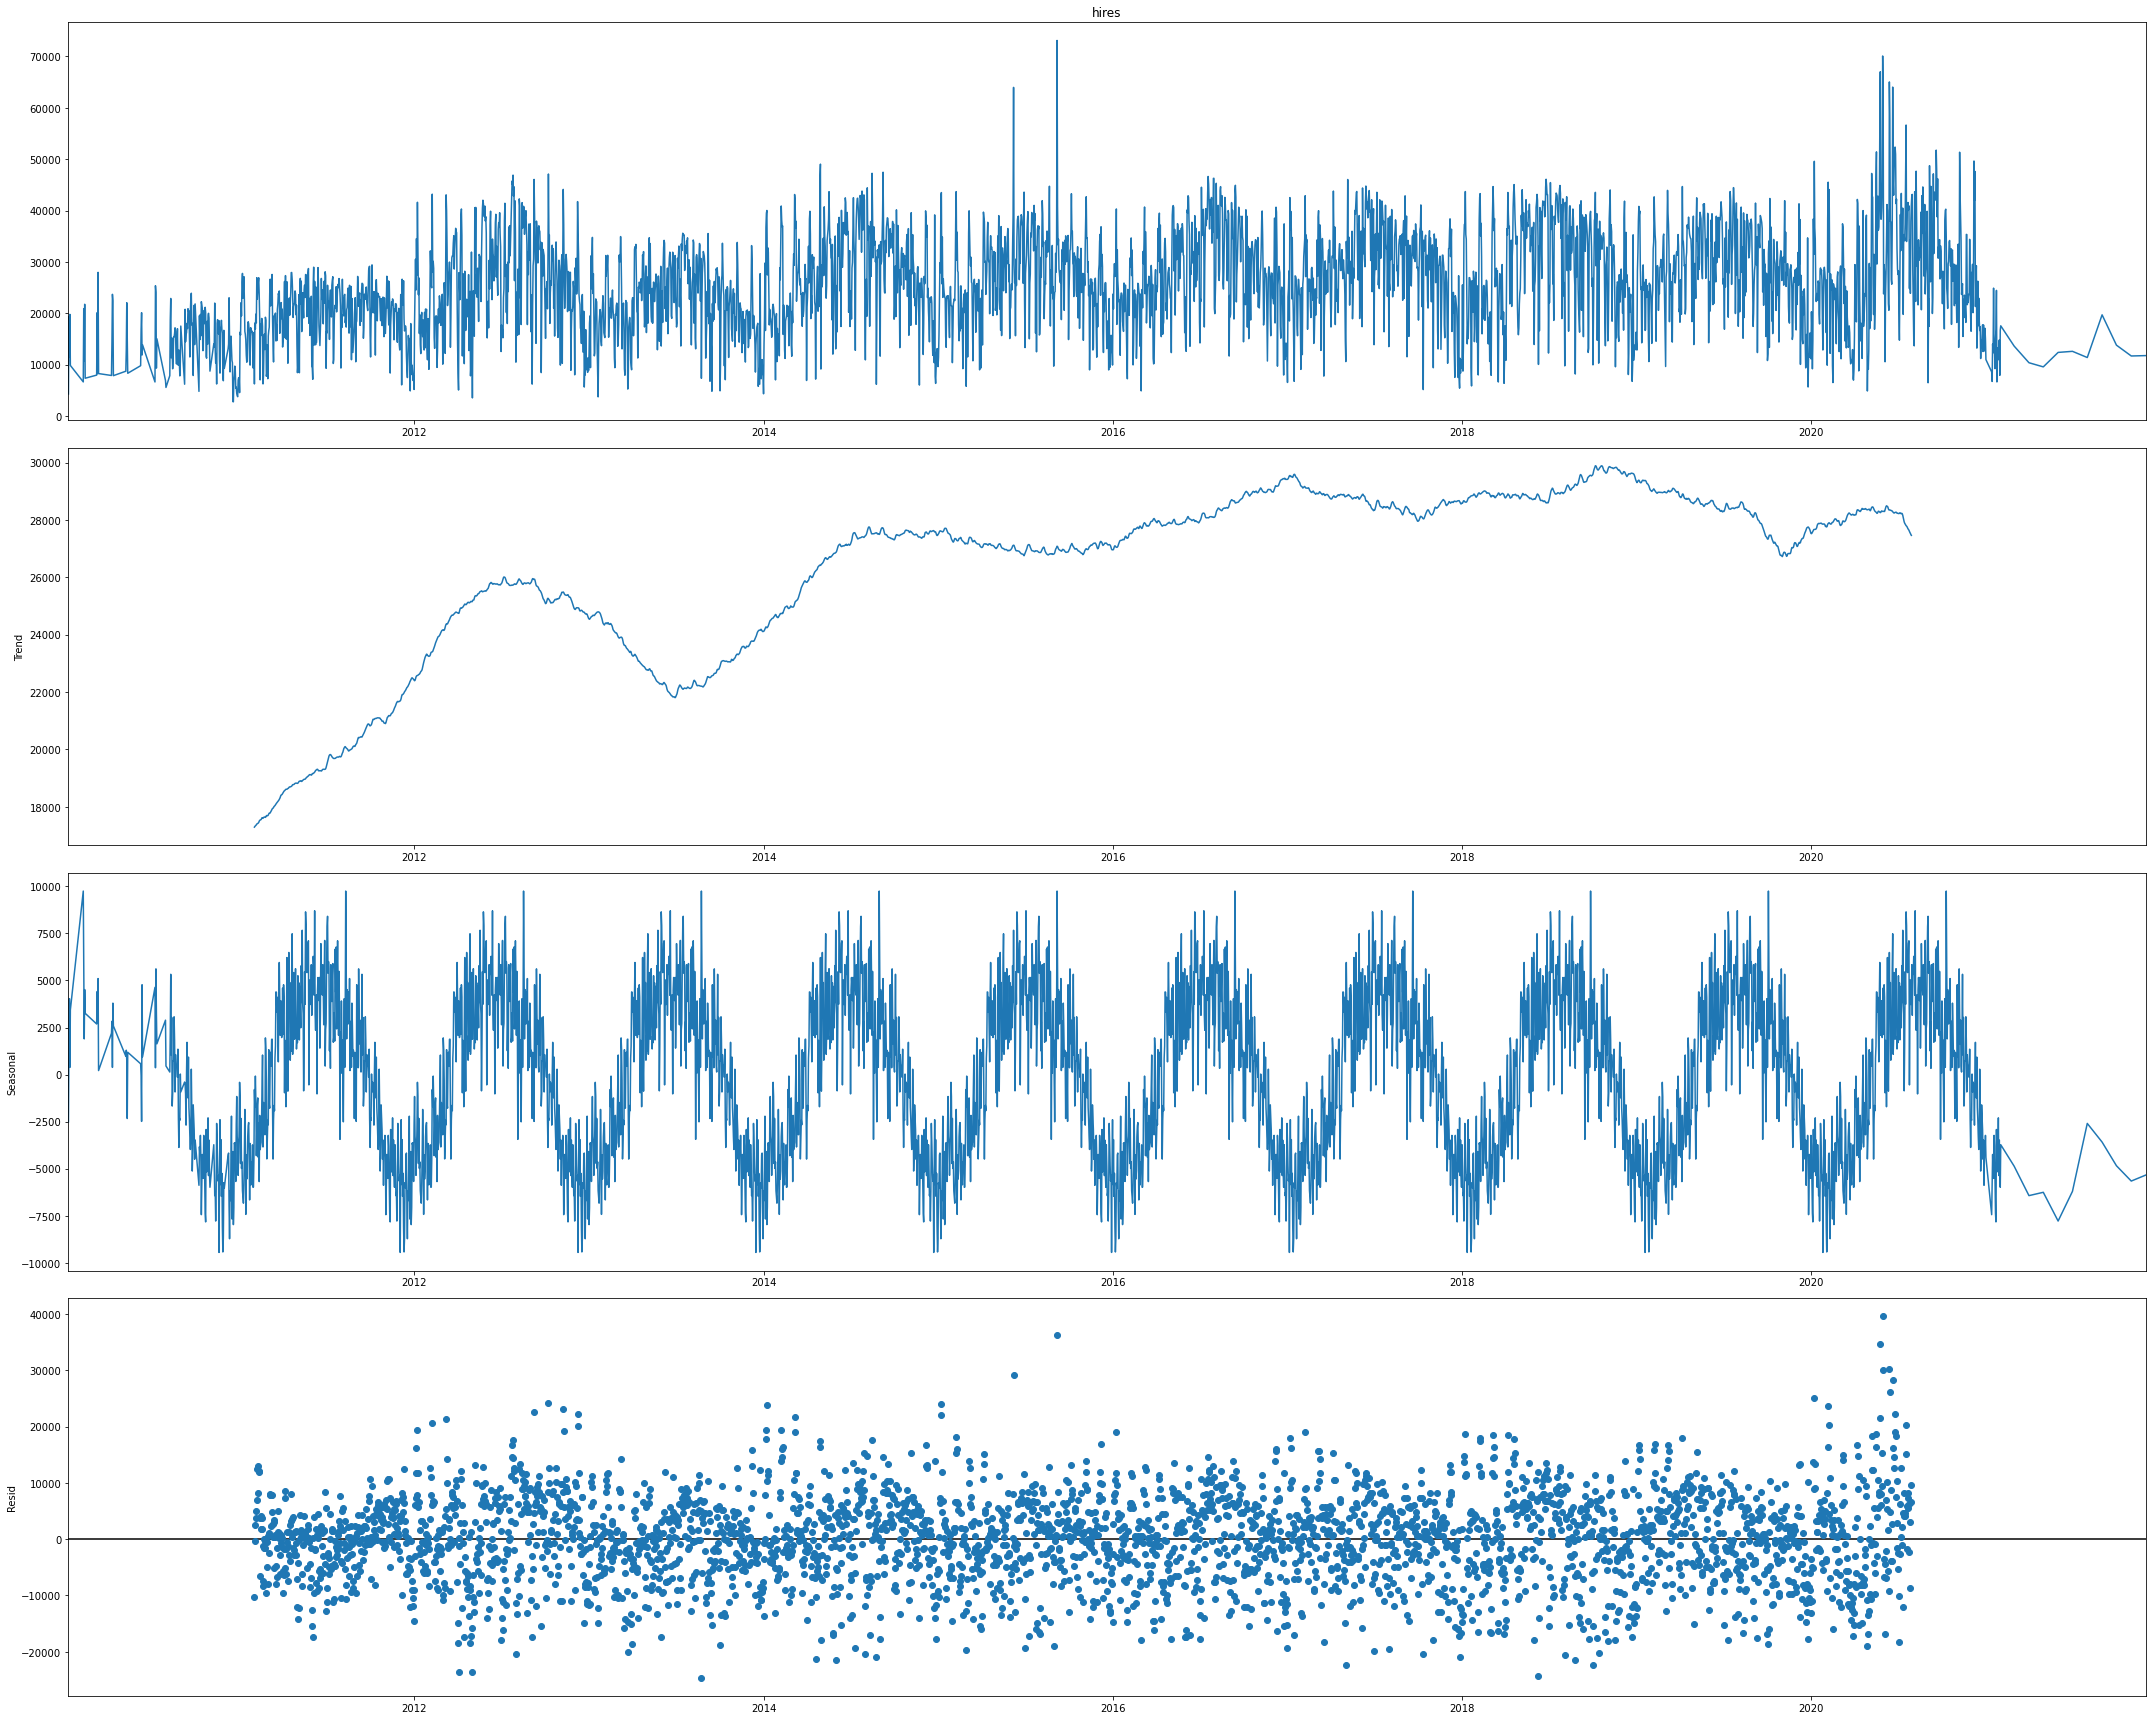

In [12]:
%matplotlib inline
print('mean :' , daily_hires.hires.mean())
res = sm.tsa.seasonal_decompose(daily_hires.hires, period=12*31)

with plt.rc_context():
    plt.rc("figure", figsize=(30,24))
    res.plot()
#export plot to image file
plt.savefig('time_series.png')

    
    